Write Python code to implement the following. Consider dataset files as “iris.csv”

1. Build a Random Forest (RF) classifier to classify IRIS flower dataset

Accuracy (10 estimators): 1.0000


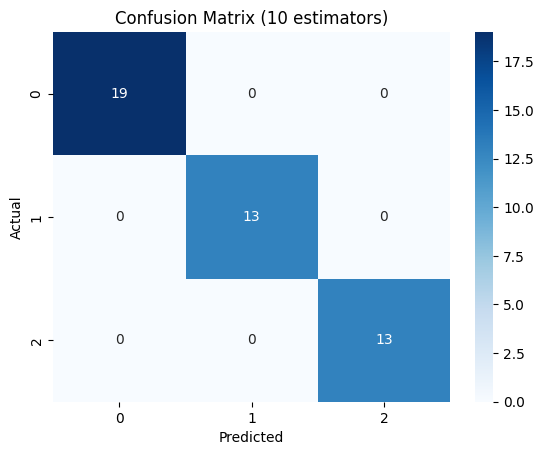

Best Accuracy: 1.0000 with 1 trees


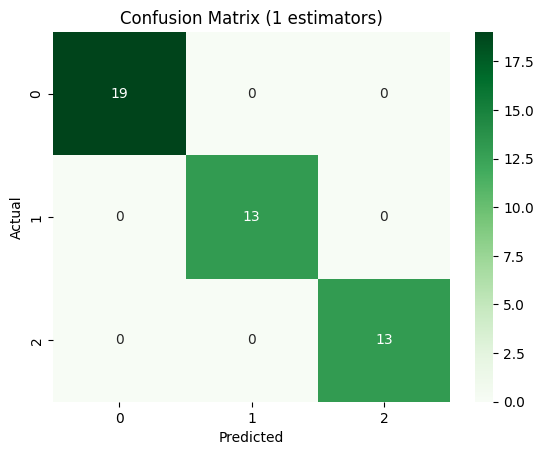

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/iris (2).csv")
X = df.drop(columns=['species'])
y = df['species']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a default Random Forest with 10 estimators
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (10 estimators): {acc:.4f}")
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (10 estimators)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Hyperparameter tuning: Try from 1 to 30 trees
scores = []
for n in range(1, 31):
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    scores.append((n, accuracy_score(y_test, pred)))

# Find best accuracy
best_n, best_score = max(scores, key=lambda x: x[1])
print(f"Best Accuracy: {best_score:.4f} with {best_n} trees")

# Evaluate with best model
best_rf = RandomForestClassifier(n_estimators=best_n, random_state=42)
best_rf.fit(X_train, y_train)
best_pred = best_rf.predict(X_test)
best_cm = confusion_matrix(y_test, best_pred)

sns.heatmap(best_cm, annot=True, fmt='d', cmap='Greens')
plt.title(f"Confusion Matrix ({best_n} estimators)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


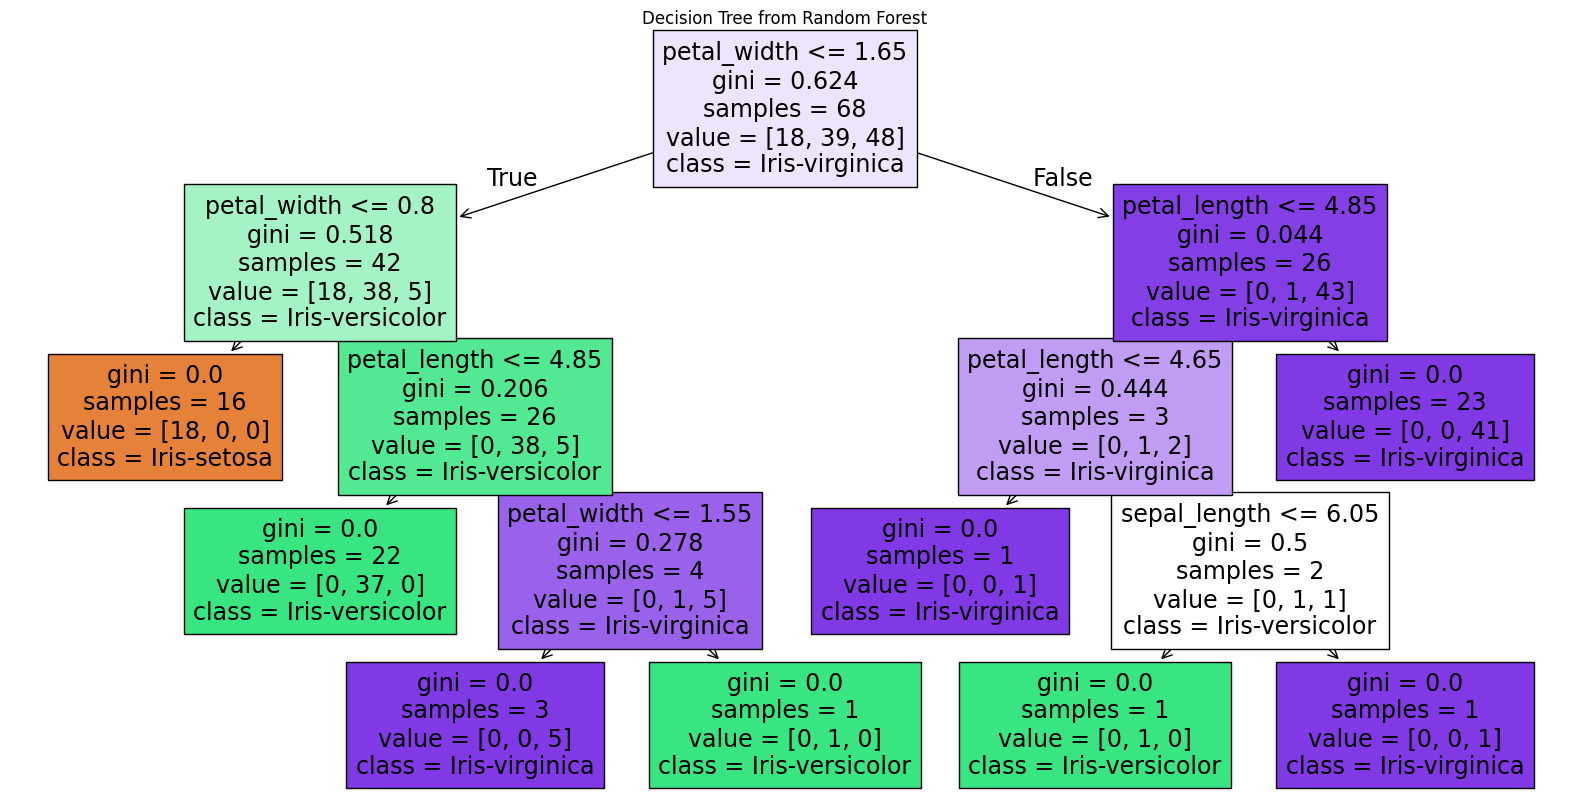

In [2]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Use the best model or any trained RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=best_n, random_state=42)
rf_model.fit(X_train, y_train)

# Plot the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=rf_model.classes_, filled=True)
plt.title("Decision Tree from Random Forest")
plt.show()


Now fine tune your model by changing number of trees in your classifer and identify what best score you can get using how
many trees

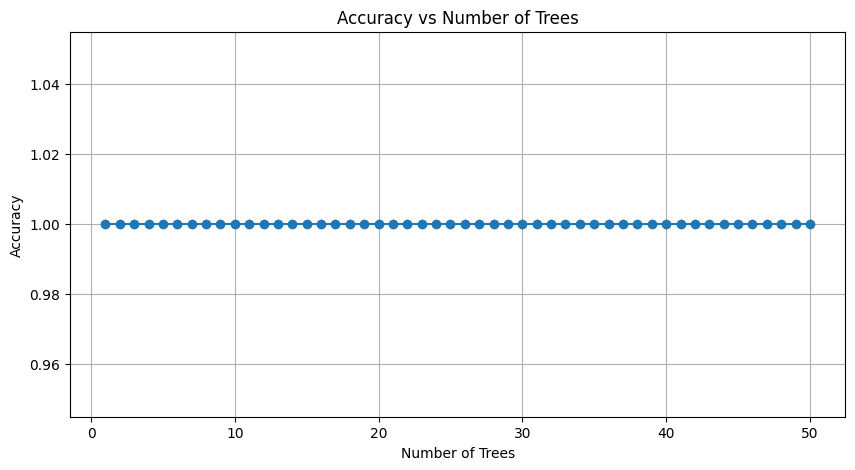

Best Accuracy: 1.0000 with 1 trees


In [3]:

import matplotlib.pyplot as plt

scores = []
tree_range = range(1, 51)

for n in tree_range:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    scores.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(tree_range, scores, marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Trees")
plt.grid(True)
plt.show()


best_score = max(scores)
best_n = tree_range[scores.index(best_score)]
print(f"Best Accuracy: {best_score:.4f} with {best_n} trees")
